In [60]:
%matplotlib inline

import pickle
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
rcParams['figure.figsize'] = 12, 6
rcParams.update({'font.size':16})

# Load metrics from pickle file

In [157]:
SPAN_LENGTH = 1
LEARNING_RATE = 0.01
filename = 'data/log_span_1_5.pkl'
with open(filename,'rb') as handle:
    data = pickle.load(handle)

print "The following metrics have been loaded: %s" % data.keys()


The following metrics have been loaded: ['acc', 'loss', 'val_acc', 'val_loss']


# Plot Learning Rates (cross-entropy loss and accuracy)

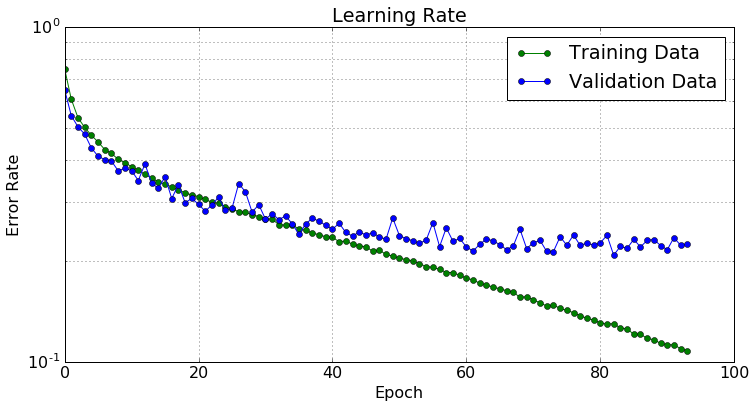

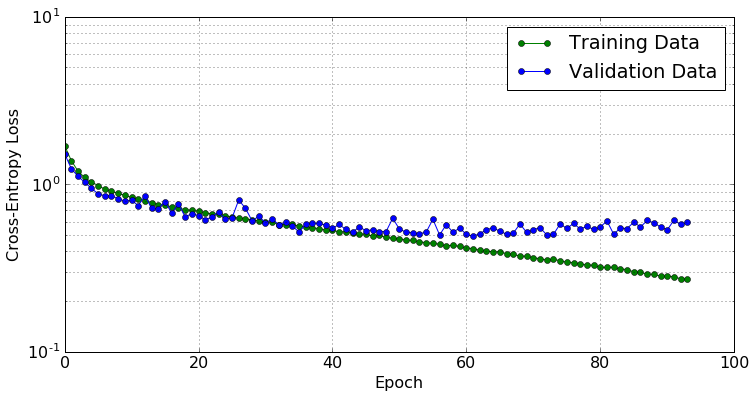

[0.35016666666666668, 0.4568333333651225, 0.49696666666666667, 0.52133333333333332, 0.56506666666666672, 0.58866666666666667, 0.59850000003178916, 0.60253333336512249, 0.62793333333333334, 0.62140000006357832, 0.62739999999999996, 0.6521333333969116, 0.61020000003178909, 0.6581000000953674, 0.67043333339691158, 0.64276666679382322, 0.69266666673024491, 0.66176666666666661, 0.70133333333333336, 0.69243333336512247, 0.70456666673024493, 0.71823333339691164, 0.70599999999999996, 0.68953333336512246, 0.7166000000953674, 0.71253333339691161, 0.65933333346048995, 0.67803333339691163, 0.71996666666666664, 0.70546666669845581, 0.73323333346048991, 0.7230333334287008, 0.73420000006357833, 0.72726666676203411, 0.74173333346048986, 0.7599000000953674, 0.7419, 0.73156666679382321, 0.73696666679382328, 0.74436666673024499, 0.75113333339691157, 0.74076666666666668, 0.75666666669845584, 0.76259999999999994, 0.75580000003178915, 0.76053333339691165, 0.75750000003178919, 0.76373333342870076, 0.76776666

In [158]:
num_epochs = len(data['acc'])

def plot_data(data, style, xlabel='', ylabel='', title='',
              grid=True, log=True):
    
    for d,s in zip(data,style):
        plt.plot(range(num_epochs),d,s[0],label=s[1])

    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    if title: plt.title(title)
    if log: plt.yscale('log')
    if grid: plt.grid(True, which='both')
    plt.legend(loc=1)
    plt.show()

plt.figure(1)
plot_data([1-np.array(data['acc']), 1-np.array(data['val_acc'])],
          [['g-o','Training Data'],['b-o','Validation Data']],
         'Epoch','Error Rate', 'Learning Rate',log=True)


plt.figure(2)
plot_data([data['loss'], data['val_loss']],
          [['g-o','Training Data'],['b-o','Validation Data']],
         'Epoch','Cross-Entropy Loss', log=True)

print data['val_acc']

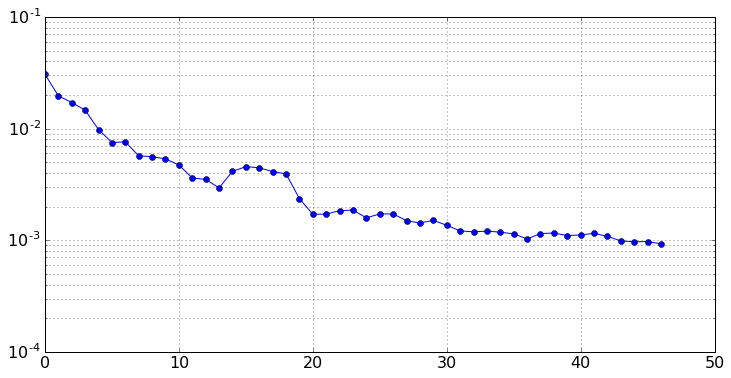

In [138]:
# take the data['acc'] and do a moving average
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

plt.plot(moving_average(1-np.array(data['val_acc']),n=5),'b-o')
plt.yscale('log')
plt.grid(True, which='both')
plt.show()